## Importing The Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier


## Load The Dataset

In [3]:
df=pd.read_csv('drive/MyDrive/DS_dataset.csv')
df

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0
...,...,...,...,...,...,...,...
30824,7047231,12.094,0.899,G5,C3,Bronze,1
30825,7079889,43.214,6.484,G5,C1,Bronze,1
30826,7155901,20.902,6.159,G5,C1,Bronze,1
30827,7180919,11.443,0.000,G5,C3,Bronze,0


## Summarize Data

In [4]:
df.shape

(30829, 7)

In [5]:
df.size

215803

In [6]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [7]:
# Descriptive statistics
df.describe()

,Customer_ID,Var1,Var2,Purchased_ABC_product
count,3.082900e+04,30829.000000,30829.000000,30829.000000
mean,3.057482e+06,64.868318,4.994489,0.503552
std,2.210470e+06,114.373345,9.533546,0.499995
min,6.470000e+02,0.251000,0.000000,0.000000
25%,1.501804e+06,13.256000,0.668000,0.000000
50%,2.192582e+06,31.860000,2.189000,1.000000
75%,4.732076e+06,68.702000,5.482000,1.000000
max,7.285914e+06,2909.776000,317.380000,1.000000


In [8]:
# Class proportion
result_counts = df.groupby('Purchased_ABC_product').size()
print(result_counts)

Purchased_ABC_product
0    15305
1    15524
dtype: int64


# **EDA**

## Duplicates

In [9]:
#Count of duplicated rows
df[df.duplicated()].shape


(0, 7)

In [10]:
#Print the duplicated rows
df[df.duplicated()]

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product


## Missing Values

In [11]:
df[df.isnull().any(axis=1)]

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product


In [12]:
#count of missing values.
df.isnull().sum()

Customer_ID              0
Var1                     0
Var2                     0
Group                    0
Category                 0
Rating                   0
Purchased_ABC_product    0
dtype: int64

## Oulier Detection
###### We will use IQR (Interquartile Range Method) to deal with outliers.

Text(0, 0.5, 'Frequency')

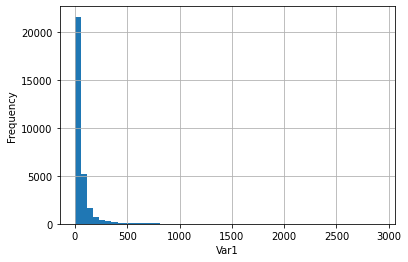

In [13]:
figure=df.Var1.hist(bins=50)
figure.set_xlabel('Var1')
figure.set_ylabel('Frequency')

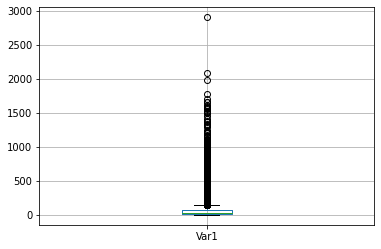

In [14]:
df.boxplot(column="Var1")

In [15]:
df['Var1'].max()

2909.776

In [16]:
df['Var1'].min()

0.251

In [17]:
#Logarithmic Transformation
df['Var1'] =np.log(df['Var1'] )

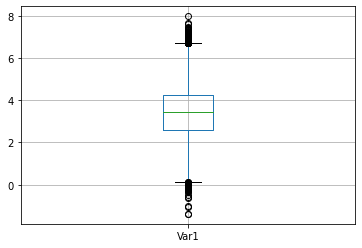

In [18]:
df.boxplot(column="Var1")

In [19]:
df['Var1'].describe()

count    30829.000000
mean         3.395549
std          1.273777
min         -1.382302
25%          2.584450
50%          3.461351
75%          4.229778
max          7.975831
Name: Var1, dtype: float64

In [20]:
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.Var1.quantile(0.75)-df.Var1.quantile(0.25)
IQR

1.645328030761808

In [21]:
lower_bridge=df['Var1'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Var1'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.11645823398154986
6.697770357028781


(None, None)

In [22]:
#Extreme outliers
lower_bridge=df['Var1'].quantile(0.25)-(IQR*3)
upper_bridge=df['Var1'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-2.3515338121611618
9.165762403171492


(None, None)

In [25]:
df.loc[df['Var1']>= 9,'Var1']= 9
df.loc[df['Var1']<= -2,'Var1']= -2

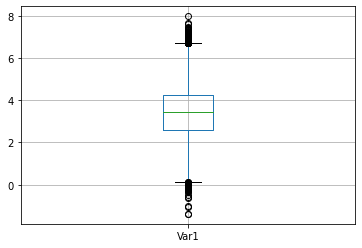

In [24]:
df.boxplot(column="Var1")

Text(0, 0.5, 'Frequency')

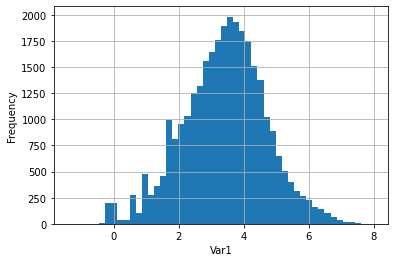

In [26]:
figure=df.Var1.hist(bins=50)
figure.set_xlabel('Var1')
figure.set_ylabel('Frequency')

In [27]:
df

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,3.726512,12.123,G1,C1,Bronze,0
1,40515,2.245486,0.256,G1,C1,Bronze,0
2,52697,3.626977,3.199,G1,C2,Gold,0
3,68202,4.400775,1.645,G1,C1,Silver,0
4,130003,3.845990,1.706,G1,C1,Silver,0
...,...,...,...,...,...,...,...
30824,7047231,2.492709,0.899,G5,C3,Bronze,1
30825,7079889,3.766165,6.484,G5,C1,Bronze,1
30826,7155901,3.039845,6.159,G5,C1,Bronze,1
30827,7180919,2.437378,0.000,G5,C3,Bronze,0


## Feature Engineering

Label Encoding for non-numerical columns

In [4]:
x=df.iloc[:, [3,4,5]]
x

,Group,Category,Rating
0,G1,C1,Bronze
1,G1,C1,Bronze
2,G1,C2,Gold
3,G1,C1,Silver
4,G1,C1,Silver
...,...,...,...
30824,G5,C3,Bronze
30825,G5,C1,Bronze
30826,G5,C1,Bronze
30827,G5,C3,Bronze


In [5]:
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)
X

,Group,Category,Rating
0,0,0,0
1,0,0,0
2,0,1,1
3,0,0,2
4,0,0,2
...,...,...,...
30824,4,2,0
30825,4,0,0
30826,4,0,0
30827,4,2,0


In [6]:
X.dtypes

Group       int64
Category    int64
Rating      int64
dtype: object

In [7]:
df2=df.drop(["Group","Category","Rating"],axis=1)

In [8]:
data=pd.concat([df2,X],axis=1)
data

,Customer_ID,Var1,Var2,Purchased_ABC_product,Group,Category,Rating
0,5518,41.534,12.123,0,0,0,0
1,40515,9.445,0.256,0,0,0,0
2,52697,37.599,3.199,0,0,1,1
3,68202,81.514,1.645,0,0,0,2
4,130003,46.805,1.706,0,0,0,2
...,...,...,...,...,...,...,...
30824,7047231,12.094,0.899,1,4,2,0
30825,7079889,43.214,6.484,1,4,0,0
30826,7155901,20.902,6.159,1,4,0,0
30827,7180919,11.443,0.000,0,4,2,0


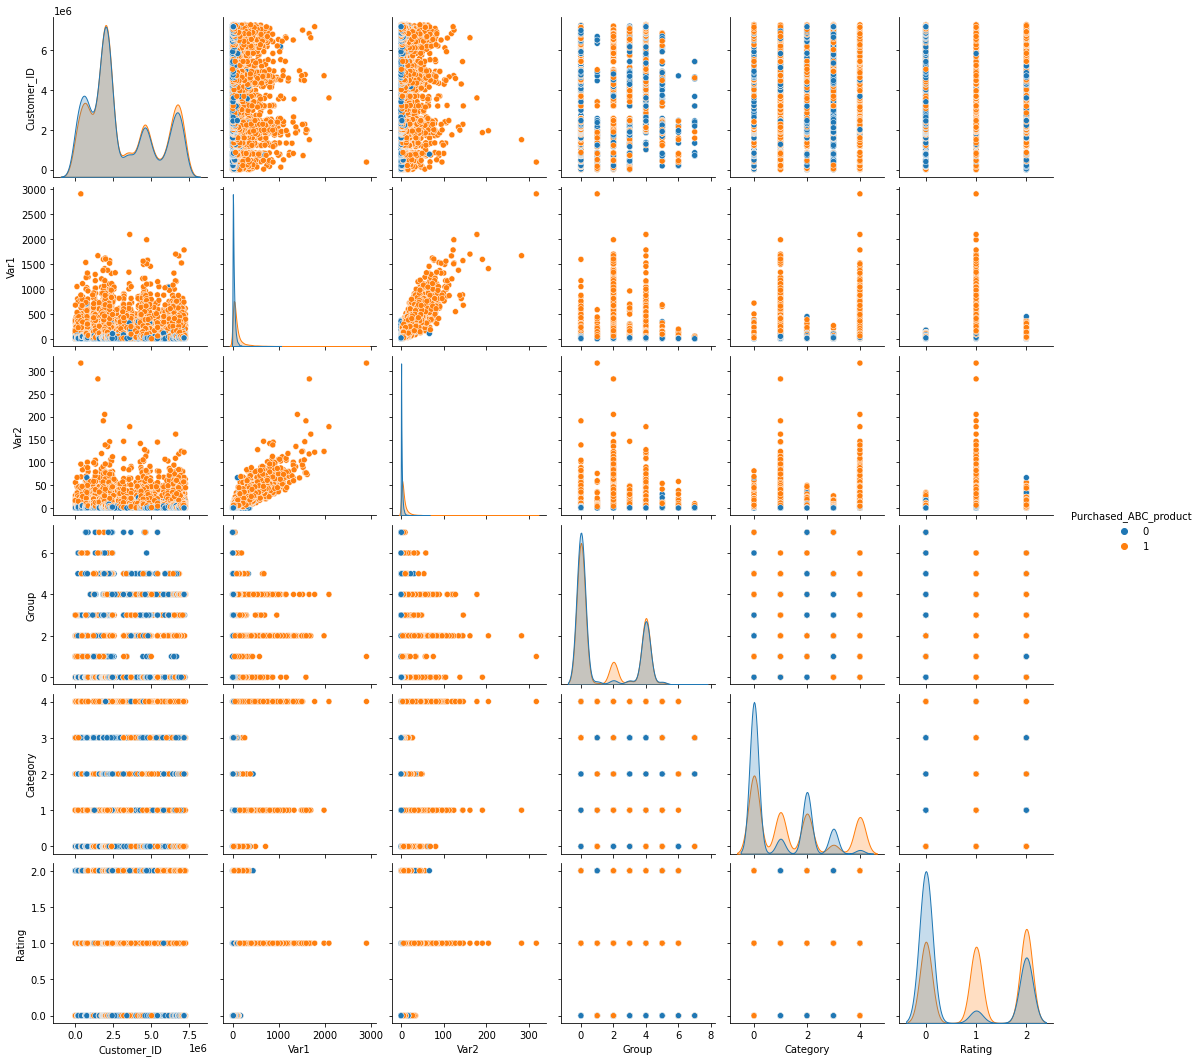

In [9]:
#Visualisation:
import seaborn as sns
sns.pairplot(data,hue='Purchased_ABC_product')

## Feature Selection(Extra Trees Classifier)
Using extratreesclassifier we can conclude that 'rating','Var1','Var2' variables are influencing most of the purchase of product ‘ABC’.


In [11]:
X = data.drop(['Purchased_ABC_product'],axis = 1)# independent features
y = data['Purchased_ABC_product']# dependent feature

In [12]:
#Feature Importance:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [13]:
print(model.feature_importances_) 

[0.19812851 0.24209737 0.38190865 0.01837866 0.06575537 0.09373146]


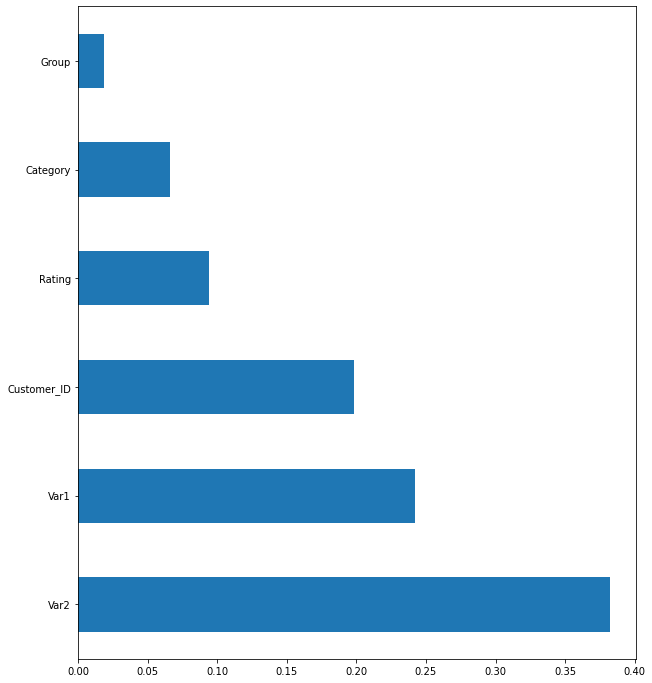

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,12))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Check whether the data is balanced or not

[Text(0, 0, 'Non-Purchased'), Text(0, 0, 'Purchased')]

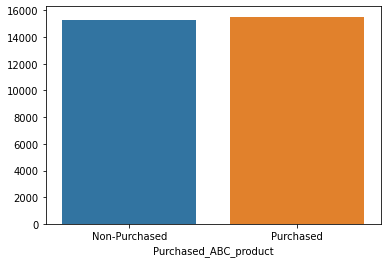

In [ ]:
bar = data.groupby("Purchased_ABC_product").count().iloc[:,0]
t=sns.barplot(x = bar.index, y=bar.values)
t.set_xticklabels(['Non-Purchased','Purchased'])

In [ ]:
y.value_counts(normalize=True)

1    0.503552
0    0.496448
Name: Purchased_ABC_product, dtype: float64

### Here we can see that our data is balanced.

## Spliting the data into training and Testing datset to avoid overfitting.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=None)

# Model Building

In [16]:
result_df = {
    "model":[],
    "training_score" :[],
    "testing_score": []
}

def modify_result(model, trainSc, testSc):
    result_df["model"].append(model)
    result_df["training_score"].append(trainSc)
    result_df["testing_score"].append(testSc)

## Random Forest Classifier

In [17]:
#Random forest classifier after hyperparameter tunning
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Random forest classifier",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 1.0
Testing Score:0.8496479245555104


In [20]:
y_pred=classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[10326     0]
 [    0 10329]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10326
           1       1.00      1.00      1.00     10329

    accuracy                           1.00     20655
   macro avg       1.00      1.00      1.00     20655
weighted avg       1.00      1.00      1.00     20655



In [21]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3630 1349]
 [1145 4050]]
0.7548653430312562
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      4979
           1       0.75      0.78      0.76      5195

    accuracy                           0.75     10174
   macro avg       0.76      0.75      0.75     10174
weighted avg       0.76      0.75      0.75     10174



## XGBoost Classifier

In [29]:
import xgboost 
from xgboost import XGBClassifier
clf =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_train, y_train)

XGBClassifier(eval_metric='auc', min_child_weight=0, n_estimators=300,
              random_state=100, seed=10)

In [26]:
import xgboost 
from xgboost import XGBClassifier
#clf =XGBClassifier(n_estimators=1000)
#clf.fit(X_train, y_train)

XGBClassifier(n_estimators=1000)

In [23]:
y_pred = clf.predict(X_test)
ytrain_pred =clf.predict_proba(X_train)
ytest_pred = clf.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("XGBoost",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.8805696235157152
Testing Score:0.8662053579799354


In [30]:
y_pred=clf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[7659 2667]
 [1758 8571]]
0.7857661583151779
              precision    recall  f1-score   support

           0       0.81      0.74      0.78     10326
           1       0.76      0.83      0.79     10329

    accuracy                           0.79     20655
   macro avg       0.79      0.79      0.79     20655
weighted avg       0.79      0.79      0.79     20655



In [31]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3579 1400]
 [ 940 4255]]
0.7700019657951641
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      4979
           1       0.75      0.82      0.78      5195

    accuracy                           0.77     10174
   macro avg       0.77      0.77      0.77     10174
weighted avg       0.77      0.77      0.77     10174



In [ ]:
#clf =CatBoostClassifier(n_estimators=1000)
#clf.fit(X_train, y_train)

In [ ]:
!pip install catboost

In [ ]:
#import lightgbm 
#from lightgbm import LGBMClassifier
#import catboost
#from catboost import CatBoostClassifier

In [ ]:
#clf =LGBMClassifier(n_estimators=1000)
#clf.fit(X_train, y_train)

LGBMClassifier(n_estimators=1000)

### Hyperparameter optimization using RandomizedSearchCV in XGBoost

In [32]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [33]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,refit=True,cv=10,verbose=3)

In [34]:
random_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)>

In [35]:
random_search.estimator

XGBClassifier()

In [ ]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
classifier.fit(X_train,y_train)

XGBClassifier(booster='dart', eval_metric='auc', min_child_weight=0,
              n_estimators=300, random_state=100, seed=10)

##Gradient Boosting Classifier

In [36]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
clf_gr = GradientBoostingClassifier(n_estimators= 100,learning_rate =0.01, max_depth = 3, random_state = 0)
clf_gr.fit(X_train, y_train)

pred_gr = clf_gr.predict(X_test)

print('(learning_rate=0.01, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_gr.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {}'
     .format(clf_gr.score(X_test, y_test)))
print('Accuracy score: {}'.format(accuracy_score(y_test, pred_gr)))

print('y_test and pred: {}'.format(y_test[:20]))
print('pred: {}'.format(pred_gr))
from sklearn.metrics import classification_report
reportLReg_gf = classification_report(y_test, pred_gr, output_dict=True)
crLReg_gf = pd.DataFrame(reportLReg_gf).transpose()
crLReg_gf


(learning_rate=0.01, max_depth=3)
Accuracy of GBDT classifier on training set: 0.76
Accuracy of GBDT classifier on test set: 0.763908000786318
Accuracy score: 0.763908000786318
y_test and pred: 8477     1
8357     0
26743    1
17930    0
7948     0
25101    1
7890     1
12173    0
10948    1
5353     1
18621    1
13023    0
6370     1
15700    1
8098     0
26476    1
10225    1
24360    1
29064    0
13501    1
Name: Purchased_ABC_product, dtype: int64
pred: [1 0 1 ... 1 1 0]


,precision,recall,f1-score,support
0,0.809959,0.676240,0.737084,4979.000000
1,0.732092,0.847931,0.785765,5195.000000
accuracy,0.763908,0.763908,0.763908,0.763908
macro avg,0.771026,0.762085,0.761425,10174.000000
weighted avg,0.770199,0.763908,0.761941,10174.000000


In [37]:
y_pred = clf_gr.predict(X_test)
ytrain_pred =clf_gr.predict_proba(X_train)
ytest_pred = clf_gr.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Gradient Boosting",
             accuracy_score(clf_gr.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.8595694250669532
Testing Score:0.8595926761503223


In [38]:
y_pred=clf_gr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3367 1612]
 [ 790 4405]]
0.763908000786318
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      4979
           1       0.73      0.85      0.79      5195

    accuracy                           0.76     10174
   macro avg       0.77      0.76      0.76     10174
weighted avg       0.77      0.76      0.76     10174



## Guassian Naive Bayes

In [39]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GB
classifier= GB()
classifier.fit(X_train,y_train)

GaussianNB()

In [40]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Guassian Naive Bayes",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.7414547209325303
Testing Score:0.7506868404565779


In [41]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4884   95]
 [4072 1123]]
0.5904265775506192
              precision    recall  f1-score   support

           0       0.55      0.98      0.70      4979
           1       0.92      0.22      0.35      5195

    accuracy                           0.59     10174
   macro avg       0.73      0.60      0.53     10174
weighted avg       0.74      0.59      0.52     10174



## AdaBoost Classifier

In [42]:
##Adaboost classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [43]:
y_pred = model.predict(X_test)
ytrain_pred =model.predict_proba(X_train)
ytest_pred = model.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Adaboost classifier",
             accuracy_score(model.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.8519436990192903
Testing Score:0.8533695998651507


In [44]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3234 1745]
 [ 665 4530]]
0.7631216827206605
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      4979
           1       0.72      0.87      0.79      5195

    accuracy                           0.76     10174
   macro avg       0.78      0.76      0.76     10174
weighted avg       0.77      0.76      0.76     10174



## Logistic Regression

In [45]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()
clf1.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = clf1.predict(X_test)
ytrain_pred =clf.predict_proba(X_train)
ytest_pred = clf.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Logistic Regression",
             accuracy_score(clf1.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.8805696235157152
Testing Score:0.8662053579799354


In [47]:
y_pred = clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2727 2252]
 [1420 3775]]
0.6390800078631806
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      4979
           1       0.63      0.73      0.67      5195

    accuracy                           0.64     10174
   macro avg       0.64      0.64      0.64     10174
weighted avg       0.64      0.64      0.64     10174



## KNeighbors Classifier

In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn_classifier.predict(X_test)
ytrain_pred =knn_classifier.predict_proba(X_train)
ytest_pred = knn_classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("KNN",
             accuracy_score(knn_classifier.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.764250212179661
Testing Score:0.5312318281537027


In [50]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2775 2204]
 [2678 2517]]
0.5201494004324749
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      4979
           1       0.53      0.48      0.51      5195

    accuracy                           0.52     10174
   macro avg       0.52      0.52      0.52     10174
weighted avg       0.52      0.52      0.52     10174



## DecisionTree Classifier

In [51]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = model.predict(X_test)
ytrain_pred = model.predict_proba(X_train)
ytest_pred = model.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Decision Tree Classifier",
             accuracy_score(model.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 1.0
Testing Score:0.710069162474694


In [53]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3518 1461]
 [1488 3707]]
0.7101435030469825
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      4979
           1       0.72      0.71      0.72      5195

    accuracy                           0.71     10174
   macro avg       0.71      0.71      0.71     10174
weighted avg       0.71      0.71      0.71     10174



## Bagging Classifier

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=7)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model1.predict(X_test)
ytrain_pred = model1.predict_proba(X_train)
ytest_pred = model1.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Bagged Decision Tree Classifier",
             accuracy_score(model1.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 1.0
Testing Score:0.8478776211387153


In [56]:
y_pred=model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3609 1370]
 [1123 4072]]
0.7549636327894633
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      4979
           1       0.75      0.78      0.77      5195

    accuracy                           0.75     10174
   macro avg       0.76      0.75      0.75     10174
weighted avg       0.76      0.75      0.75     10174



## SVM

In [57]:
#SVM
from sklearn import svm

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
clff = SVC(probability=True)
clff.fit(X_train,y_train)
ytrain_pred = clff.predict_proba(X_train)
print('Training Score: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = clff.predict_proba(X_test)
print('Testing Score: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

modify_result("SVM",
             accuracy_score(clff.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))


Training Score: 0.5189294672821785
Testing Score: 0.529463013182798


In [58]:
y_pred=clff.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2257 2722]
 [2179 3016]]
0.5182818950265382
              precision    recall  f1-score   support

           0       0.51      0.45      0.48      4979
           1       0.53      0.58      0.55      5195

    accuracy                           0.52     10174
   macro avg       0.52      0.52      0.52     10174
weighted avg       0.52      0.52      0.52     10174



In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = clff,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

### Compare the algorithms

In [59]:
data=pd.DataFrame(result_df)
data.sort_values(['testing_score'],ascending=False)

,model,training_score,testing_score
1,XGBoost,1.000000,0.770002
2,Gradient Boosting,0.760058,0.763908
4,Adaboost classifier,0.756863,0.763122
8,Bagged Decision Tree Classifier,1.000000,0.754964
9,SVM,0.512854,0.754964
0,Random forest classifier,1.000000,0.754865
7,Decision Tree Classifier,1.000000,0.710144
5,Logistic Regression,0.641733,0.639080
3,Guassian Naive Bayes,0.595788,0.590427
6,KNN,0.700605,0.520149


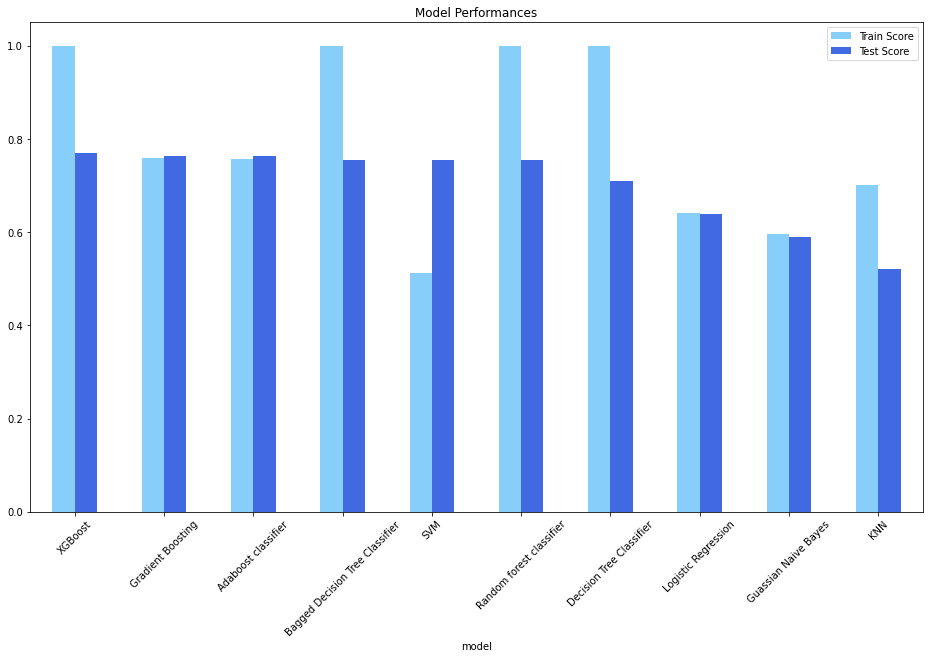

In [60]:
data = pd.DataFrame(result_df)
data.sort_values(by="testing_score", ascending=False).plot(kind="bar", x="model", rot=45, figsize=(16,9),color=["lightskyblue","royalblue"])
plt.title("Model Performances")
plt.ylabel=("Accuracy Score")
plt.xlabel=("Models")
plt.legend(["Train Score","Test Score"])

## **Finalize Model**(XGBoost)
We are finalizing XGBoost classifier as it is giving good testing accuracy.

In [61]:
clf =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_train, y_train)

XGBClassifier(eval_metric='auc', min_child_weight=0, n_estimators=300,
              random_state=100, seed=10)

In [62]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3579 1400]
 [ 940 4255]]
0.7700019657951641
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      4979
           1       0.75      0.82      0.78      5195

    accuracy                           0.77     10174
   macro avg       0.77      0.77      0.77     10174
weighted avg       0.77      0.77      0.77     10174



In [73]:
print('y_test and pred: {}'.format(y_test[:20]))
print('pred: {}'.format(pred))

y_test and pred: 8477     1
8357     0
26743    1
17930    0
7948     0
25101    1
7890     1
12173    0
10948    1
5353     1
18621    1
13023    0
6370     1
15700    1
8098     0
26476    1
10225    1
24360    1
29064    0
13501    1
Name: Purchased_ABC_product, dtype: int64
pred: [0 0 0 ... 0 0 0]


### SHAP values

In [ ]:
!pip install shap

In [78]:
import shap
shap_values = shap.TreeExplainer(clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train)
shap_values

array([[ 1.38978958e-01, -1.11827545e-01, -7.72928357e-01,
         9.22475457e-02, -8.82089585e-02,  5.04687652e-02],
       [-4.41076681e-02, -9.31319222e-03, -8.65663707e-01,
        -5.08677401e-02, -1.01919666e-01,  5.29212728e-02],
       [-7.87834972e-02,  1.69864967e-01, -8.55174446e+00,
        -5.49763292e-02, -1.05752133e-01, -6.79827034e-02],
       ...,
       [ 7.39242882e-03,  9.49258432e-02, -1.86175835e+00,
        -6.18906170e-02, -2.10008789e-02, -2.87802145e-02],
       [-1.12647355e-01,  2.13064402e-01, -8.27200603e+00,
        -5.35940044e-02, -9.53634530e-02, -7.13421851e-02],
       [-5.33577129e-02,  3.64137590e-02, -6.05901122e-01,
        -4.55750152e-02, -5.50843254e-02, -1.58382524e-02]], dtype=float32)

## Best Thresholds and ROC Curve

In [63]:
pred=[]
for model in [clf]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8662053579799354


In [64]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9996126e+00, 9.9961251e-01, 9.9948066e-01, ..., 1.7897267e-04,
       1.7866014e-04, 1.1365487e-04], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
44,0.498453,0.680853
43,0.523967,0.680853
42,0.526622,0.680853
36,0.595189,0.680657
45,0.493068,0.680657


In [68]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
plot_roc_curve(fpr,tpr)

## Model Saving 

In [ ]:
import pickle
with open('model_final','wb') as f:
 pickle.dump(classifier,f)